<a href="https://colab.research.google.com/github/LimGuenTaek/pymldg-rev/blob/main/04_%EB%B6%84%EB%A5%98/4_2_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블 학습

앙상블 학습을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말합니다.

어려운 문제의 결론을 내기 위해 여러 명의 전문가로 위원회를 구성해 다양한 의견을 수렴하고 결정하듯이 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기 보다 신뢰성이 높은 예측 값을 얻는 것 입니다.

이미지 , 영상 , 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만 , 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있습니다.

앙상블 알고리즘의 대표격인 랜덤 포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용 , 다양한 활용도로 인해 그간 분석가 및 데이터 과학자들 사이에서 많이 애용 됐습니다.

부스팅 계열의 앙상블 알고리즘의 인기와 강세가 계속 이어져 기존의 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘의 개발이 가속화 됐습니다. 데이터 과학자들이 기량을 겨루는 오픈 플랫폼인 Kaggle에서 매력적인 솔루션으로 불리는 XGBoost , LightGBM , stacking을 포함해 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 모으고 있습니다.

앙상블 학습의 유형은 전통적으로 보팅(voting) , 배깅(Bagging) , 부스팅(Boosting)의 세 가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있습니다.

* 보팅(Voting)

  보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것입니다. 선형 회귀 , KNN , SVM 이라는 3가지의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측을 선정하는 방식입니다.

* 배깅(Bagging)

  배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 , 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것 입니다. 단일 ML 알고리즘으로 여러 분류기가 학습으로 개별 예측을 하는 데 학습 하는 데이터 세트가 보팅 방식과는 다릅니다. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데 , 이렇게 개별 Classifier에게 데이터를 샘플링 해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라 부릅니다. 중첩을 허용하는 즉 , 복원 추출 샘플링 방식이라 생각하시면 됩니다.

## 보팅 유형 - Hard Voting , Soft Voting

보팅 방법에는 두 가지가 있습니다. 하드 보팅을 이용한 분류는 다수결의 원칙과 비슷합니다. 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것입니다. 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정합니다.

일반적으로 소프트 보팅이 보팅 방법으로 적용됩니다.

**Hard Voting**

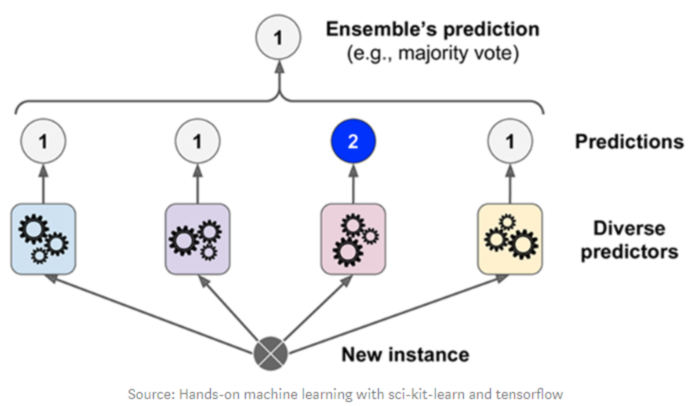

**Soft Voting**

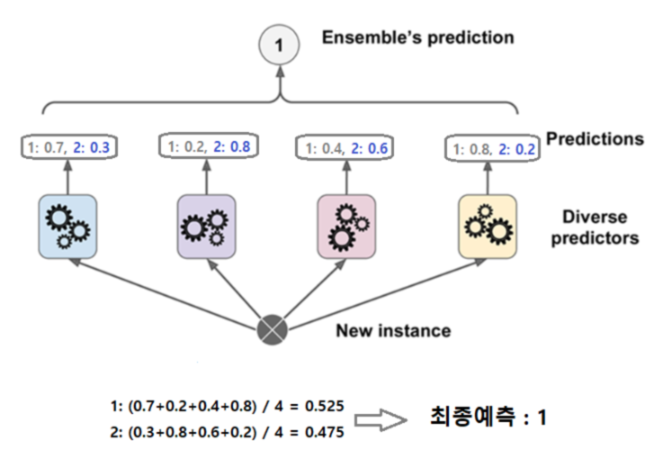

## 보팅 분류기(Voting Classifier) 

사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공하고 있습니다.

로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어 보겠습니다.

VotingClassifier 클래스는 주요 생성 인자로 estimators 와 voting 값을 입력 받습니다.

estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifer 객체들을 튜플 형식으로 입력 받습ㅂ니다.

In [3]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


보팅 분류기가 정확도가 조금 높게 나타났는데 , 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않습니다. 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때 보다 나을 수도 있습니다.